# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import glob
import logging
import logging.handlers
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient coun
cities_dataframe = pd.DataFrame(cities)
cities_dataframe.head()

,0
0,avarua
1,butaritari
2,berdigestyakh
3,hermanus
4,lebu


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#getting current weather for each city
# url to help with loggining 'https://docs.python.org/2.6/library/logging.html'
cities_dataframe_w = pd.DataFrame()
params = {
    "appid": api_key
}

counter_1 = 0
counter_2 = 0

weather_vara = []
for city in cities:
    
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    call_url = f'{base_url}'
    params['q'] = city
    weather_vara = requests.get(call_url, params=params).json()
    #pprint.pprint(weather_vara)
 
    try:
        cities_dataframe_w.loc[city, 'Cloudiness'] = weather_vara['clouds']['all']
        
        cities_dataframe_w.loc[city,'Country'] = weather_vara['sys']['country']
        cities_dataframe_w.loc[city,'Date'] = weather_vara['dt']
        cities_dataframe_w.loc[city,'Humidity'] = weather_vara['main']['humidity']
        cities_dataframe_w.loc[city,'Lat'] = weather_vara['coord']['lat']
        cities_dataframe_w.loc[city,'Lng'] = weather_vara['coord']['lon']
        cities_dataframe_w.loc[city,'Max Temp'] = weather_vara['main']['temp_max']
        cities_dataframe_w.loc[city,'Wind Speed'] = weather_vara['wind']['speed']
        cities_dataframe_w.loc[city,'Found'] = 'true' 
        print(f'Processing Record {counter_1} of set {counter_2} | {city}')
        if counter_1 < 50:
            counter_1 += 1
        else:
            counter_1 = 0
            counter_2 += 0
            
            
    except:
        cities_dataframe_w.loc[city,'Found'] = 'false'
        print('City not found, Skipping...')

Processing Record 0 of set 0 | avarua
Processing Record 1 of set 0 | butaritari
Processing Record 2 of set 0 | berdigestyakh
Processing Record 3 of set 0 | hermanus
Processing Record 4 of set 0 | lebu
Processing Record 5 of set 0 | vardo
Processing Record 6 of set 0 | busselton
Processing Record 7 of set 0 | vaini
Processing Record 8 of set 0 | mataura
Processing Record 9 of set 0 | albany
Processing Record 10 of set 0 | kapaa
Processing Record 11 of set 0 | paez
City not found, Skipping...
Processing Record 12 of set 0 | ilulissat
Processing Record 13 of set 0 | ushuaia
Processing Record 14 of set 0 | okhotsk
Processing Record 15 of set 0 | punta arenas
Processing Record 16 of set 0 | naze
Processing Record 17 of set 0 | bejar
Processing Record 18 of set 0 | pisco
Processing Record 19 of set 0 | oxford
Processing Record 20 of set 0 | airai
City not found, Skipping...
Processing Record 21 of set 0 | georgiyevka
Processing Record 22 of set 0 | cape town
Processing Record 23 of set 0 | r

Processing Record 33 of set 0 | omboue
Processing Record 34 of set 0 | geraldton
Processing Record 35 of set 0 | owerri
City not found, Skipping...
Processing Record 36 of set 0 | tiksi
Processing Record 37 of set 0 | vila do maio
Processing Record 38 of set 0 | yarim
Processing Record 39 of set 0 | bakchar
Processing Record 40 of set 0 | kruisfontein
City not found, Skipping...
Processing Record 41 of set 0 | tuy hoa
Processing Record 42 of set 0 | kavaratti
Processing Record 43 of set 0 | tilichiki
Processing Record 44 of set 0 | brae
Processing Record 45 of set 0 | palana
Processing Record 46 of set 0 | port elizabeth
Processing Record 47 of set 0 | moree
Processing Record 48 of set 0 | ostrovnoy
Processing Record 49 of set 0 | axim
City not found, Skipping...
Processing Record 50 of set 0 | pella
Processing Record 0 of set 0 | bashtanka
Processing Record 1 of set 0 | aklavik
Processing Record 2 of set 0 | obihiro
Processing Record 3 of set 0 | isla mujeres
Processing Record 4 of se

Processing Record 15 of set 0 | ancud
City not found, Skipping...
Processing Record 16 of set 0 | zaraza
Processing Record 17 of set 0 | fukue
Processing Record 18 of set 0 | ust-kuyga
Processing Record 19 of set 0 | hermiston
City not found, Skipping...
Processing Record 20 of set 0 | labuan
Processing Record 21 of set 0 | nisia floresta
Processing Record 22 of set 0 | reyes
Processing Record 23 of set 0 | komsomolskiy
Processing Record 24 of set 0 | lagoa
Processing Record 25 of set 0 | tyukalinsk
Processing Record 26 of set 0 | yuncheng
Processing Record 27 of set 0 | coquimbo
Processing Record 28 of set 0 | peace river
Processing Record 29 of set 0 | touros
Processing Record 30 of set 0 | talaya
City not found, Skipping...
Processing Record 31 of set 0 | camacha
Processing Record 32 of set 0 | sarangani
City not found, Skipping...
Processing Record 33 of set 0 | almaznyy
Processing Record 34 of set 0 | linxia
City not found, Skipping...
Processing Record 35 of set 0 | batagay
Proce

In [4]:
#printing dataframe
cities_dataframe_w

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Found
avarua,15.0,CK,1.566660e+09,88.0,-21.21,-159.78,294.150,1.00,true
butaritari,56.0,KI,1.566660e+09,73.0,3.07,172.79,301.873,2.62,true
berdigestyakh,0.0,RU,1.566660e+09,88.0,62.10,126.70,284.573,0.74,true
hermanus,0.0,ZA,1.566660e+09,83.0,-34.42,19.24,291.480,1.79,true
lebu,75.0,ET,1.566660e+09,72.0,8.96,38.73,290.150,2.10,true
vardo,1.0,US,1.566660e+09,53.0,39.62,-77.74,296.480,3.60,true
busselton,100.0,AU,1.566660e+09,57.0,-33.64,115.35,283.150,6.78,true
vaini,20.0,IN,1.566660e+09,88.0,15.34,74.49,297.150,2.60,true
mataura,97.0,NZ,1.566660e+09,83.0,-46.19,168.86,279.820,1.34,true
albany,40.0,US,1.566660e+09,60.0,42.65,-73.75,294.260,4.10,true


In [5]:
updated_df = cities_dataframe_w
updated_df.to_html(bold_rows=True).replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Cloudiness</th>      <th>Country</th>      <th>Date</th>      <th>Humidity</th>      <th>Lat</th>      <th>Lng</th>      <th>Max Temp</th>      <th>Wind Speed</th>      <th>Found</th>    </tr>  </thead>  <tbody>    <tr>      <th>avarua</th>      <td>15.0</td>      <td>CK</td>      <td>1.566660e+09</td>      <td>88.0</td>      <td>-21.21</td>      <td>-159.78</td>      <td>294.150</td>      <td>1.00</td>      <td>true</td>    </tr>    <tr>      <th>butaritari</th>      <td>56.0</td>      <td>KI</td>      <td>1.566660e+09</td>      <td>73.0</td>      <td>3.07</td>      <td>172.79</td>      <td>301.873</td>      <td>2.62</td>      <td>true</td>    </tr>    <tr>      <th>berdigestyakh</th>      <td>0.0</td>      <td>RU</td>      <td>1.566660e+09</td>      <td>88.0</td>      <td>62.10</td>      <td>126.70</td>      <td>284.573</td>      <td>0.74</td>      <td>true</td>    </tr>    <tr> 

In [6]:
#converting temp to celsius
cities_dataframe_cleaned = cities_dataframe_w.dropna()

temp_convert_celsius = cities_dataframe_cleaned['Max Temp'] - 273.15
temp_convert_celsius.head()

avarua           21.000
butaritari       28.723
berdigestyakh    11.423
hermanus         18.330
lebu             17.000
Name: Max Temp, dtype: float64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#still working on it

cities_dataframe_cleaned.to_csv('file_name.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

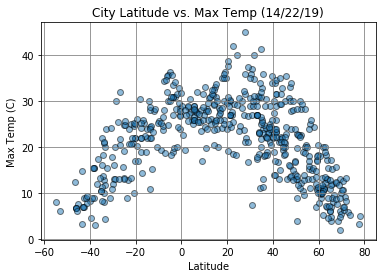

In [8]:
#becuse we live in canada, I used celsius. This isn't America
x_var1 = cities_dataframe_cleaned['Lat']
y_var1 = temp_convert_celsius

plt.title('City Latitude vs. Max Temp (14/22/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

plt.grid(b=True, which='major', color='grey', linestyle='-')

plt.scatter(x_var1, y_var1, alpha=0.5, linewidths=1, edgecolors='black')

#### Latitude vs. Humidity Plot

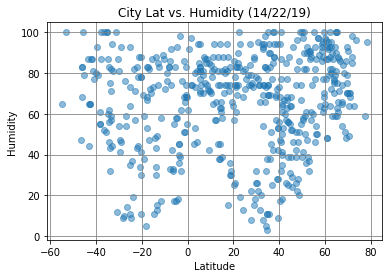

In [9]:
y_var2 = cities_dataframe_cleaned['Humidity']

plt.title('City Lat vs. Humidity (14/22/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.grid(b=True, which='major', color='grey', linestyle='-')

plt.scatter(x_var1,y_var2 , alpha=0.5)

#### Latitude vs. Cloudiness Plot

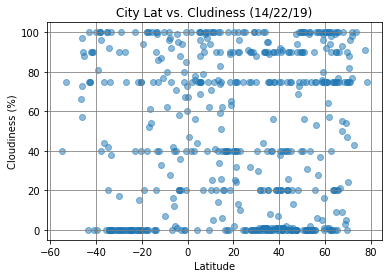

In [10]:
y_var3 = cities_dataframe_cleaned['Cloudiness']

plt.title('City Lat vs. Cludiness (14/22/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(b=True, which='major', color='grey', linestyle='-') 
plt.scatter(x_var1, y_var3 , alpha=0.5)

#### Latitude vs. Wind Speed Plot

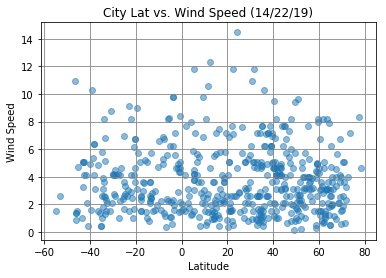

In [11]:
y_var4 = cities_dataframe_cleaned['Wind Speed']

plt.title('City Lat vs. Wind Speed (14/22/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.grid(b=True, which='major', color='grey', linestyle='-')

plt.scatter(x_var1, y_var4 , alpha=0.5)